## Potat Disease Classification

#### Import all the Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import scipy

## Import data into tensorflow dataset object

#### Used splitfolders tool to split dataset into training, validation and test directories.
#### $ pip install split-folders

#### $ splitfolders --ratio 0.8 0.1 0.1 -- ./training/PlantVillage/

In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
    '../dataset/train',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse",
 #         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 1506 images belonging to 3 classes.


In [4]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break


[[[0.56677014 0.5432407  0.59029955]
  [0.5669967  0.5434673  0.5905261 ]
  [0.5672233  0.5436939  0.5907527 ]
  ...
  [0.450165   0.41879246 0.46977285]
  [0.46089107 0.42951852 0.4804989 ]
  [0.46460247 0.43322992 0.4842103 ]]

 [[0.55604243 0.532513   0.57957184]
  [0.55638236 0.53285295 0.57991177]
  [0.5567222  0.5331928  0.58025163]
  ...
  [0.45050487 0.41913232 0.47011274]
  [0.46111766 0.42974508 0.4807255 ]
  [0.46437588 0.4330033  0.48398373]]

 [[0.5529412  0.5294118  0.5764706 ]
  [0.5529412  0.5294118  0.5764706 ]
  [0.5529412  0.5294118  0.5764706 ]
  ...
  [0.4508448  0.41947225 0.47045264]
  [0.46134424 0.4299717  0.48095208]
  [0.4641493  0.43277675 0.48375714]]

 ...

 [[0.6781405  0.6663758  0.70951307]
  [0.6626046  0.65083987 0.6939771 ]
  [0.6641427  0.652378   0.6955153 ]
  ...
  [0.5791302  0.56736547 0.6105028 ]
  [0.57924354 0.56747884 0.6106161 ]
  [0.5793568  0.5675921  0.61072934]]

 [[0.67746073 0.665696   0.7088333 ]
  [0.6622647  0.6505     0.69363725]


In [7]:
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True
)
validation_generator = validation_datagen.flow_from_directory(
    '../dataset/val',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [8]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True
)
test_generator = test_datagen.flow_from_directory(
    '../dataset/test',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [9]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.51896995 0.4601464  0.47975424]
  [0.5098534  0.45102987 0.4706377 ]
  [0.5214647  0.46264118 0.48224902]
  ...
  [0.65680534 0.6097465  0.6254328 ]
  [0.6571295  0.6100707  0.625757  ]
  [0.65745384 0.61039495 0.6260812 ]]

 [[0.51905096 0.46022746 0.4798353 ]
  [0.51009655 0.45127305 0.4708809 ]
  [0.52097833 0.4621548  0.48176268]
  ...
  [0.6676167  0.62055784 0.6362442 ]
  [0.6677788  0.62071997 0.63640624]
  [0.6679409  0.6208821  0.63656837]]

 [[0.519132   0.4603085  0.47991636]
  [0.51033974 0.45151624 0.47112408]
  [0.52049196 0.4616685  0.48127633]
  ...
  [0.66815335 0.6210945  0.6367808 ]
  [0.6680722  0.6210134  0.6366997 ]
  [0.6679912  0.6209324  0.6366187 ]]

 ...

 [[0.61150485 0.5526813  0.56444603]
  [0.61028904 0.55146545 0.56323016]
  [0.6090731  0.5502496  0.5620143 ]
  ...
  [0.74104816 0.69398934 0.7096756 ]
  [0.70522493 0.6581661  0.6738524 ]
  [0.6947659  0.6477071  0.6633934 ]]

 [[0.5619596  0.5031361  0.5149008 ]
  [0.5613112  0.50248766 0.51425236]


## Building the model

In [11]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

### Compiling the Model

#### We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric

In [13]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [14]:
1506/32

47.0625

In [15]:
215/32

6.71875

In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20
)

Epoch 1/20
47/47 [==============================] - 45s 704ms/step - loss: 0.9166 - accuracy: 0.4878 - val_loss: 0.8567 - val_accuracy: 0.4844
Epoch 2/20
47/47 [==============================] - 31s 652ms/step - loss: 0.7110 - accuracy: 0.6825 - val_loss: 0.4726 - val_accuracy: 0.8229
Epoch 3/20
47/47 [==============================] - 31s 654ms/step - loss: 0.4883 - accuracy: 0.7938 - val_loss: 0.4254 - val_accuracy: 0.8542
Epoch 4/20
47/47 [==============================] - 32s 672ms/step - loss: 0.3351 - accuracy: 0.8765 - val_loss: 0.3148 - val_accuracy: 0.8698
Epoch 5/20
47/47 [==============================] - 31s 653ms/step - loss: 0.3667 - accuracy: 0.8501 - val_loss: 0.3781 - val_accuracy: 0.8490
Epoch 6/20
47/47 [==============================] - 30s 646ms/step - loss: 0.2906 - accuracy: 0.8921 - val_loss: 0.3551 - val_accuracy: 0.8698
Epoch 7/20
47/47 [==============================] - 31s 651ms/step - loss: 0.3132 - accuracy: 0.8792 - val_loss: 0.2970 - val_accuracy: 0.8802

In [17]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 9s 604ms/step - loss: 0.0687 - accuracy: 0.9768


In [19]:
# Scores is just a list containing loss and accuracy value
scores

[0.06866639107465744, 0.9767981171607971]

### Plotting the Accuracy and Loss Curves

In [20]:
history

#### You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [21]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [23]:
len(history.history['loss'])

20

In [24]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9166011214256287,
 0.7110429406166077,
 0.4882746636867523,
 0.3350605368614197,
 0.36673474311828613]

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [27]:
acc

[0.4877883195877075,
 0.6824966073036194,
 0.7937584519386292,
 0.8765264749526978,
 0.8500678539276123,
 0.8921302556991577,
 0.8792401552200317,
 0.9009497761726379,
 0.9335142374038696,
 0.9253731369972229,
 0.9409769177436829,
 0.9443690776824951,
 0.9531885981559753,
 0.9504749178886414,
 0.9660904407501221,
 0.9681139588356018,
 0.9647218585014343,
 0.9748982191085815,
 0.9823608994483948,
 0.9810040593147278]

In [28]:
val_acc

[0.484375,
 0.8229166865348816,
 0.8541666865348816,
 0.8697916865348816,
 0.8489583134651184,
 0.8697916865348816,
 0.8802083134651184,
 0.9166666865348816,
 0.875,
 0.9166666865348816,
 0.9270833134651184,
 0.9427083134651184,
 0.953125,
 0.9375,
 0.9427083134651184,
 0.9375,
 0.9583333134651184,
 0.9635416865348816,
 0.9739583134651184,
 0.9791666865348816]

Text(0.5, 1.0, 'Training and Validation Loss')

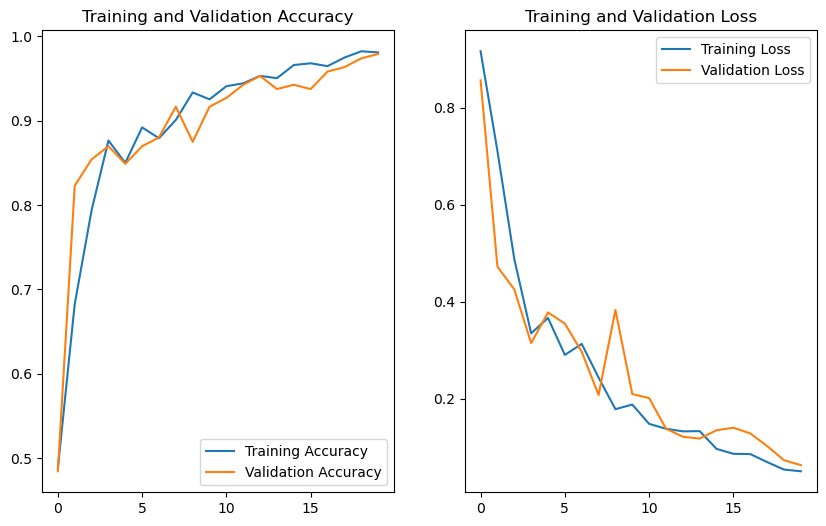

In [34]:
EPOCHS = 20

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

### Run prediction on sample image

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 0s 58ms/step
predicted label: Potato___Late_blight


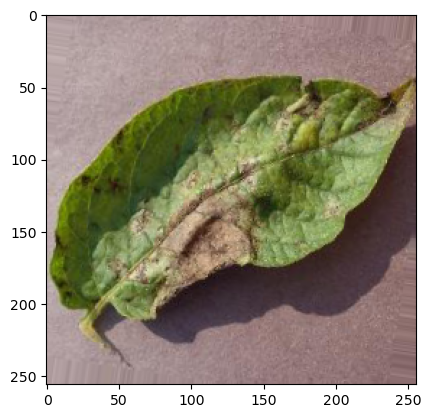

In [43]:
import numpy as np

for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = label_batch[0]

    print('first image to predict')
    plt.imshow(first_image)
    print(f'actual label: {class_names[int(first_label)]}')

    batch_prediction = model.predict(image_batch)
    print(f'predicted label: {class_names[np.argmax(batch_prediction[0])]}')

    break

### Write a function for inference

In [45]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

#### Now run inference on few sample images

1/1 [==============================] - 0s 37ms/step


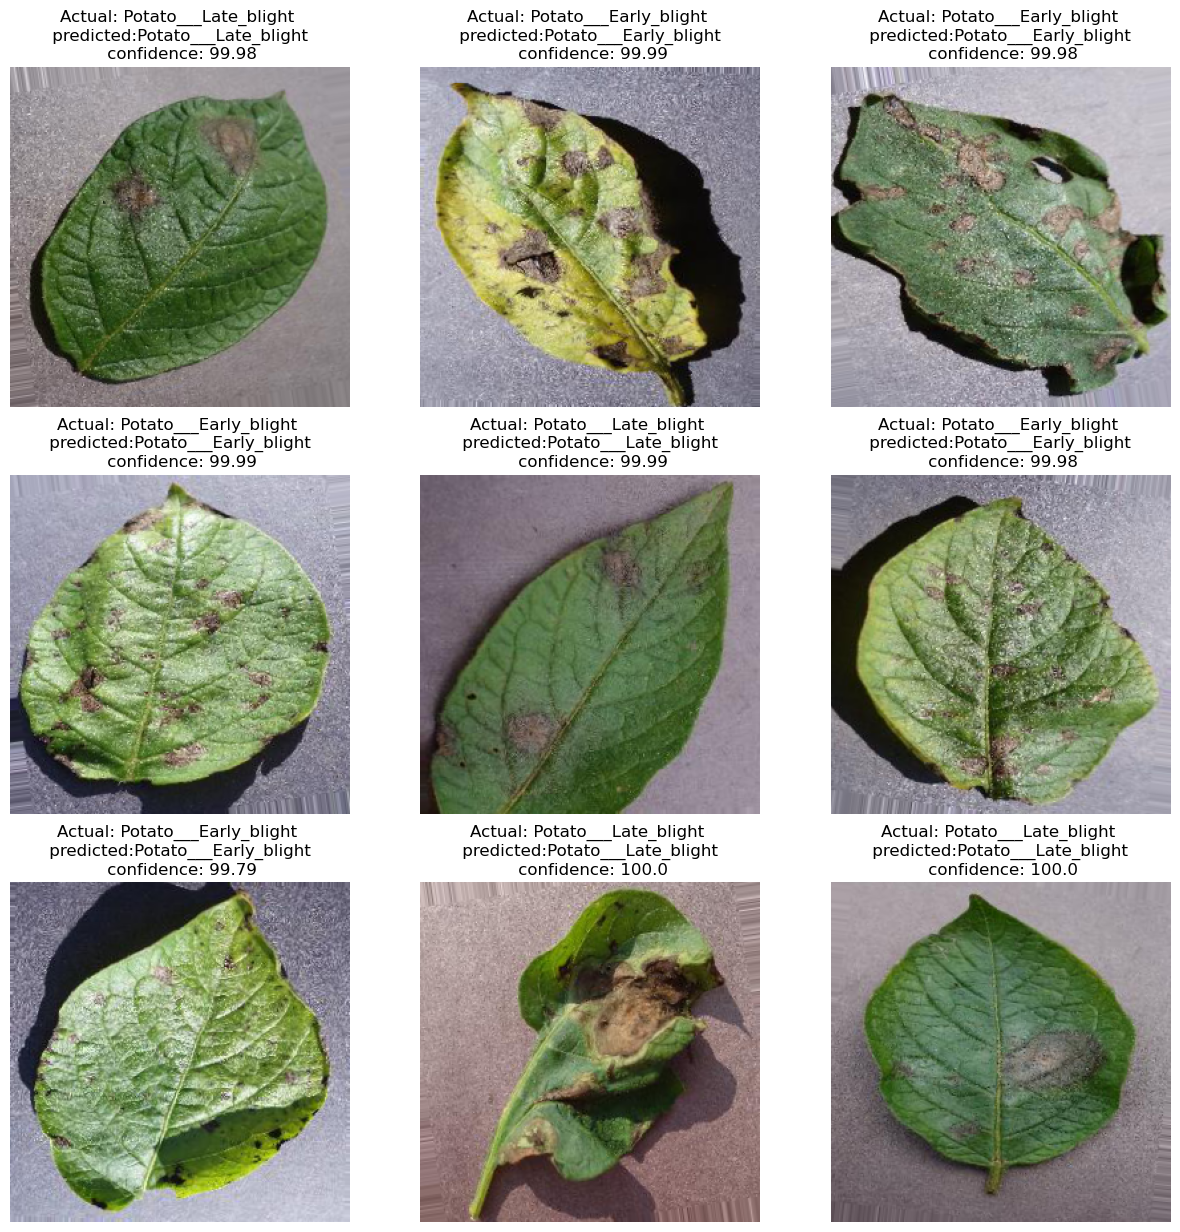

In [47]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class} \n predicted:{predicted_class} \n confidence: {confidence}")
        plt.axis("off")

    break

## Saving the Model
#### Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [48]:
model.save("../models/potatoes.h5")